# HW3 Basic Statistics: histogram, SEM, CI, Correlation

To complete this homework, you need to download the diseases.csv file, which contain the monthly number of new cases of measles, mumps, and chicken pox, respectively, for New York City during the years 1931-1971 (for a total of 41 years). The data file contains 123 rows and 12 columns. Each column represents a month from Jan to Dec. The first 41 rows are the number of new measles cases in each year during that period, the next 41 rows are for mumps, and the remaining 41 rows are chicken pox. The rows are ordered by the years in chronical order. 

(The homework script will download the file from github and use directly, or you can download the file from blackboard and save it in the same local folder as your homework script.)

Complete the python script skeleton to analyze the data for the following tasks. For your information, data has been loaded with the Pandas package and reorganized into a Numpy 3d array of shape (3, 41, 12), where the first dimension represents the three diseases. Several other variables are also defined for your convenience.

### Import necessary modules. You can add more if necessary

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

### load the data and setup some variables

After reshape, data is a numpy ndarray of shape (3,41,12) for the three diseases, 41 years and 12 months

In [2]:
# this is the order of the three diseases in the 3d array, data
diseases = ['Measles', 'Mumps', 'ChickenPox']
# define three variables for the indices of the three diseases for easier 
[me, mu, ch] = [0, 1, 2]
year = np.arange(1931, 1972)
month = np.arange(1, 13)

url = 'diseases.csv'
# comment out the following to read from local file instead online
url = 'https://raw.githubusercontent.com/jianhuaruan/3753/main/' + url
data = pd.read_csv(url,header=None).values
data = data.reshape([3, 41, 12]) #data[0], data[1], and data[2] is for measles, mumps, and chickenpox

### Q0 (Example). Yearly trend: total annual cases
Calculate the total number of cases for each year and plot as a function of year 

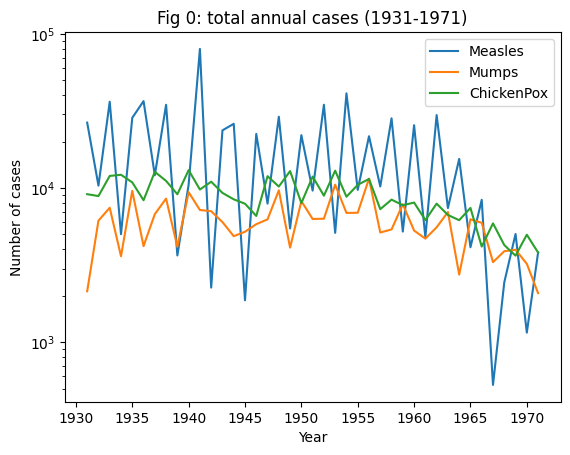

In [3]:
plt.figure()
# data is of shape (3, 41, 12), so annualCases is of shape(3, 41)
annualCases = data.sum(axis=2)
# this plot each column of annualCases.T against years
plt.semilogy(year, annualCases.T)
plt.xlabel('Year')
plt.ylabel('Number of cases')
plt.title('Fig 0: total annual cases (1931-1971)')
plt.legend(diseases)
plt.show()

### Q1.Histogram of total annual cases (10 points)

Plot a histogram of total annual cases for each disease, using the hist function with 5 bins for each disease and bin boundaries determined automatically. 

In [16]:
annualCases

array([[26519, 10354, 36216,  5015, 28490, 36548, 12091, 34604,  3653,
        10496, 79646,  2261, 23627, 26048,  1870, 22408,  7915, 28960,
         5467, 21990,  9609, 34615,  5117, 41037,  9712, 21646, 10226,
        28272,  5217, 25523,  4796, 29671,  7406, 15435,  4127,  8381,
          529,  2445,  5033,  1154,  3819],
       [ 2140,  6137,  7442,  3609,  9576,  4198,  6768,  8532,  4157,
         9392,  7198,  7069,  6010,  4870,  5202,  5825,  6261,  9652,
         4105,  8218,  6294,  6321, 10507,  6890,  6905, 11495,  5143,
         5384,  7840,  5295,  4694,  5561,  6978,  2743,  6266,  5947,
         3305,  3890,  3978,  3224,  2081],
       [ 9113,  8862, 11966, 12177, 10866,  8324, 12723, 11112,  9103,
        13046,  9773, 10978,  9290,  8441,  7905,  6586, 11921, 10214,
        12866,  7973, 11849,  8912, 12942,  8775, 10476, 11433,  7287,
         8403,  7731,  8042,  6190,  7913,  6683,  6183,  7423,  4172,
         5897,  4267,  3640,  4978,  3815]], dtype=int64)

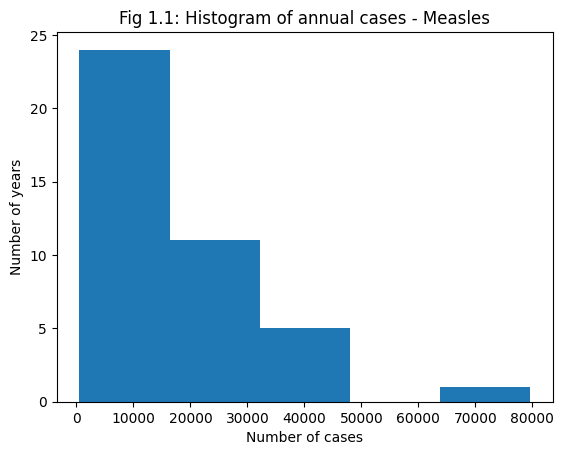

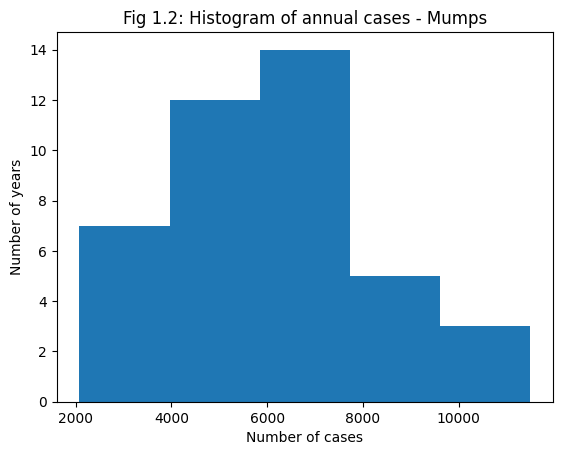

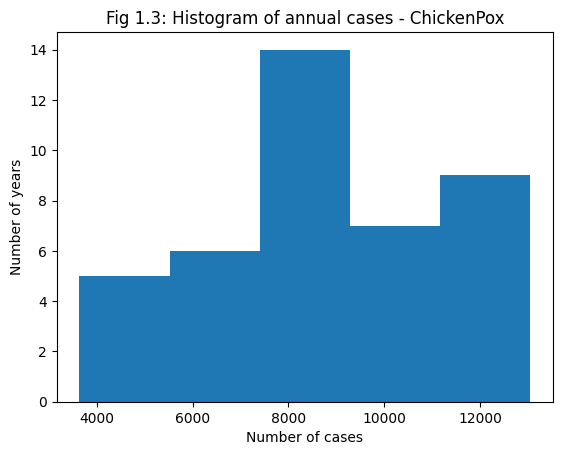

In [18]:
for i in range(3):
  plt.figure()

  plt.hist(annualCases[i], bins = 5)

  plt.title('Fig 1.' + str(i+1) + ': Histogram of annual cases - ' + diseases[i])
  plt.xlabel('Number of cases')
  plt.ylabel('Number of years')
  plt.show()



### Q2 Standard error of the mean, 95% confidence interval (10 points)

Calculate the average (mean) number of cases per year for each disease, the standard error of the mean (SEM), and the 95% confidence interval (CI) of the mean, and make two figures using the errorbar function: one shows the mean & SEM of each disease, and the other shows the mean & 95% CI for each disease. use the function plt.xticks to change xtick labels to strings.


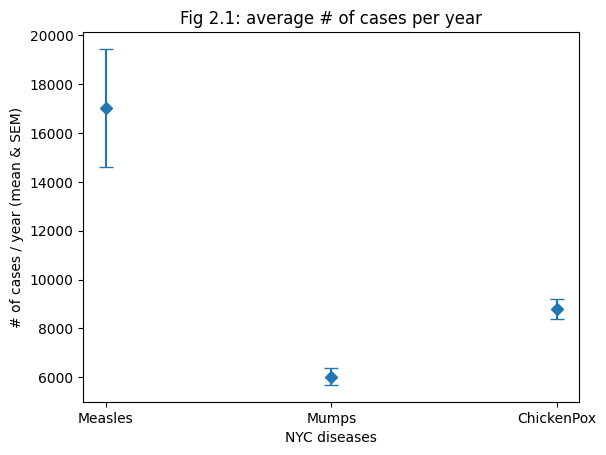

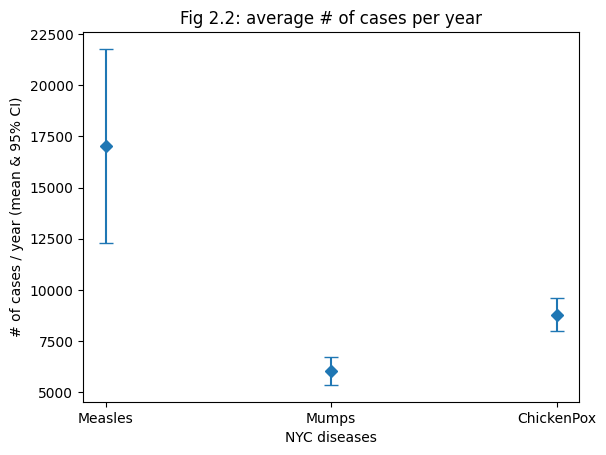

In [35]:

plt.figure()

SEM = np.std(annualCases,1)/math.sqrt(annualCases.shape[1])

plt.errorbar(["Measles","Mumps","ChickenPox"],np.mean(annualCases,1),SEM,fmt = 'D', ls = 'none',capsize = 5)

plt.xlabel('NYC diseases')
plt.xticks(range(3), diseases)
plt.ylabel('# of cases / year (mean & SEM)')
plt.title('Fig 2.1: average # of cases per year')
plt.show()

plt.figure()

plt.errorbar(["Measles","Mumps","ChickenPox"],np.mean(annualCases,1),SEM*1.96,fmt = 'D', ls = 'none',capsize = 5)

plt.xticks(range(3), diseases)
plt.xlabel('NYC diseases')
plt.ylabel('# of cases / year (mean & 95% CI)')
plt.title('Fig 2.2: average # of cases per year')
plt.show()



### % Q3 Correlation between total annual cases of measles vs mumps (10 points)

Q3.1 Scatter plot the total annual measels cases against total annual mumps cases. In other words, you are scatter plotting two vectors, x, and y, each of which has 41 values, representing the total number of measles or mumps cases in year 1931, 1932, etc. (This is the same data used to plot the blue and orange curves in Fig 0.)

Q3.2 Calculate the Pearson correlation coefficient as well as the spearman correlation coefficient between the total annual mumps cases and total annual mumps cases (the two vectors x and y you plotted in Q3.1), print out the correlation coefficient values, or display the values (with a precision 0.0001) in the figure (bonus points). (Decide the x and y positions ad hoc from your fig).

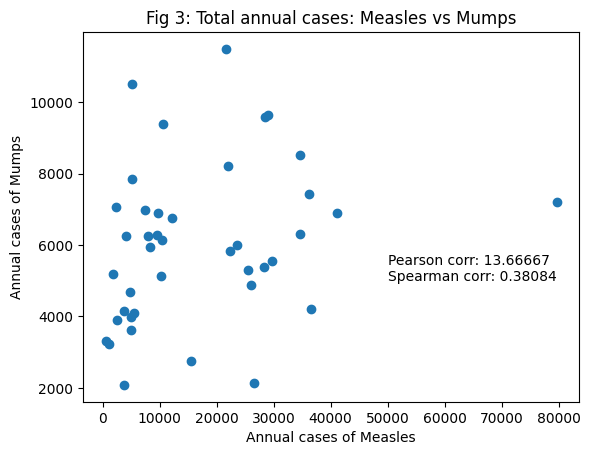

Pearson correlation: %.4f 13.66667
Spearman correlation: %.4f  0.38084


In [60]:
# 3.1 scatter plot 

plt.figure()
plt.text(50000,5000,"Pearson corr: 13.66667\nSpearman corr: 0.38084")

plt.scatter(annualCases[0],annualCases[1])


plt.xlabel('Annual cases of ' + diseases[me])
plt.ylabel('Annual cases of ' + diseases[mu])
plt.title('Fig 3: Total annual cases: %s vs %s' %(diseases[me], diseases[mu]))

# 3.2 compute and display pearson correlation coefficient & Spearman correlation 

def zscore(numArray):
   return (numArray - np.mean(numArray))/np.std(numArray)


measles = zscore(annualCases[0])

pcc = round(measles.dot(measles) /len(annualCases),5)

measles_rank = np.argsort(np.argsort(annualCases[0]))
mumps_rank = np.argsort(np.argsort(annualCases[1]))

spr = round(np.corrcoef(measles_rank,mumps_rank)[0,1],5)

plt.show()


print('Pearson correlation: %.4f',pcc )
print('Spearman correlation: %.4f ',spr)


### % Q4 Seasonal trend of the diseases (5 points) 

For each disease, calculate the average number of cases occurred in a month, breaking into Janurary, Feburary, et. The resulting matrix, denoted as C, will have a size of 3 x 12. Each row in the matrix corresponds to a specific disease, and each column corresponds to a month. The value in the matrix (Cij) represents the number of cases of disease i that occurred in month j, averaged over all 41 years. Plot the vectors as a line graph against months. 

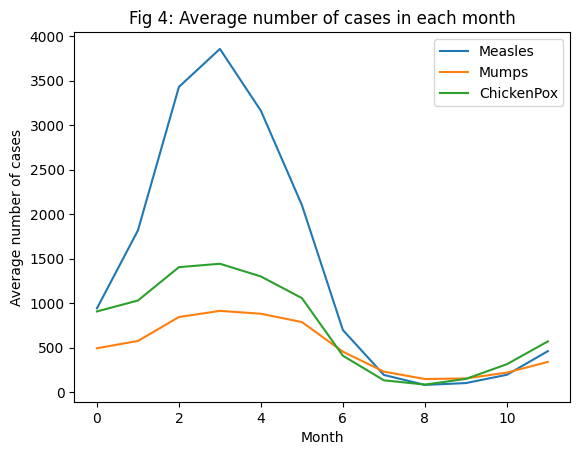

In [120]:
plt.figure()


monthlyCases = data.sum(axis=1)/41
plt.plot(monthlyCases[0])
plt.plot(monthlyCases[1])
plt.plot(monthlyCases[2])

plt.xlabel('Month')
plt.legend(["Measles","Mumps","ChickenPox"])
plt.ylabel('Average number of cases')
plt.title('Fig 4: Average number of cases in each month')
plt.show()



### % Q5 Correlation between average monthly cases of measles vs mumps. (10 points)

Q5.1 Scatter plot the average monthly mumps cases against the average monthly mumps cases. In other words, you are scatter plotting two vectors, x, and y, each of which has 12 values, representing the average number of measles or mumps cases in Janurary, Februrary, etc. (This is the same data used to plot the blue and orange curves in Fig 4.)

Q5.2 Calculate the Pearson correlation coefficient as well as the spearman correlation coefficient between the mean monthly mumps cases and mean monthly mumps cases (the two vectors x and y you plotted in Q5.1), print out the correlation coeffients, or display the values (with a precision 0.0001) in the figure (bonus points).

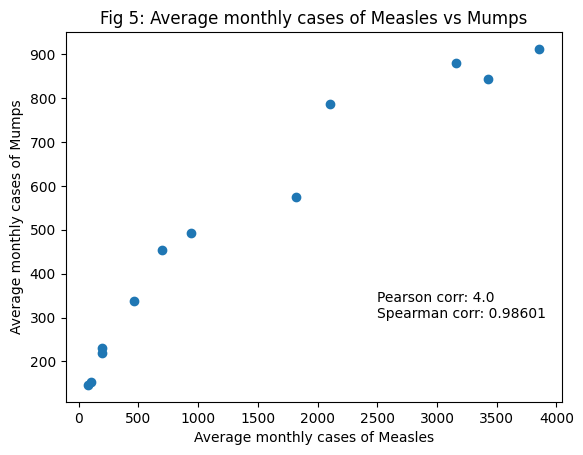

Pearson corr: %.4f 4.0
Spearman corr: %.4f 0.98601


In [89]:
# Q5.1 scatter plot 


plt.figure()

plt.text(2500,300,"Pearson corr: 4.0 \nSpearman corr: 0.98601 ")

plt.scatter(monthlyCases[0],monthlyCases[1])


plt.xlabel('Average monthly cases of ' + diseases[me])
plt.ylabel('Average monthly cases of ' + diseases[mu])

plt.title('Fig 5: Average monthly cases of %s vs %s' %(diseases[me], diseases[mu]))

# Q5.2 compute and display pearson correlation & Spearman correlation coefficient 

def zscore(numArray):
   return (numArray - np.mean(numArray))/np.std(numArray)


measles = zscore(monthlyCases[0])

pcc = round(measles.dot(measles) /len(monthlyCases),5)

measles_rank = np.argsort(np.argsort(monthlyCases[0]))
mumps_rank = np.argsort(np.argsort(monthlyCases[1]))

spr = round(np.corrcoef(measles_rank,mumps_rank)[0,1],5)

plt.show()

print('Pearson corr: %.4f',pcc )
print('Spearman corr: %.4f',spr)


In [137]:
data_2 = data.reshape(3,492)

### % Q6 Correlation between measles and mumps, overall trend (15 points)
 
For this analysis, we will consider each month in the dataset as a separate data point (a total of 41 x 12 = 492), instead of computing average or total of multiple years/months. You may need the flat function or something similar (last slide in the numpy lecture).

Q6.1 Plot the monthly cases of measles and monthly cases of mumps versus the month indices (from 0 to 491) as line graphs. 

Q6.2 Scatter plot the monthly cases of measles vs monthly cases of mumps. Compute the pearson and spearman correlation coefficients and display.

Q6.3 scatter plot in loglog scale, and compute and display the two correlation coefficients after log transformation of the values. 



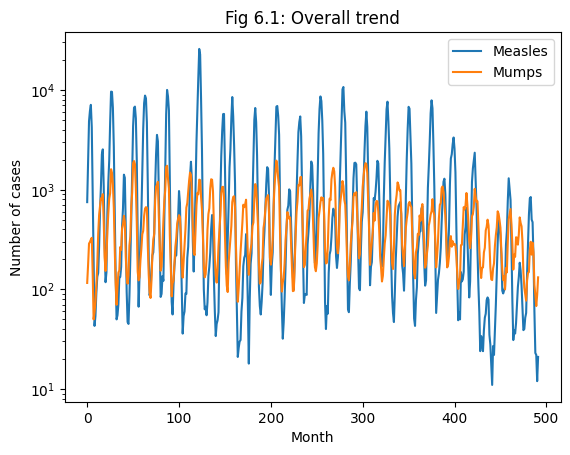

PearsonRResult(statistic=0.5466725602618482, pvalue=1.0974666408345615e-39)


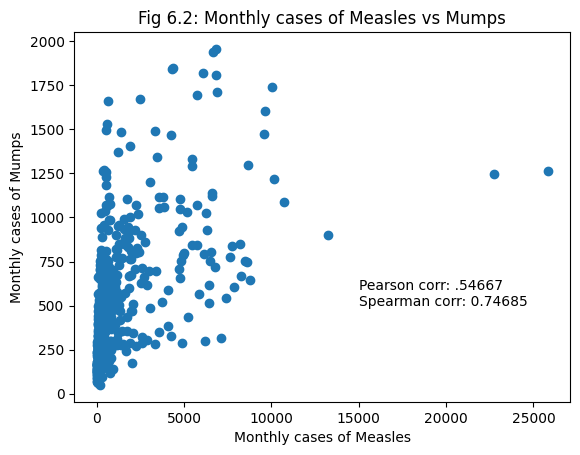

Pearson correlation in orignal space: %.4f PearsonRResult(statistic=0.5466725602618482, pvalue=1.0974666408345615e-39)
Spearman correlation in original space: %.4f  0.74685
PearsonRResult(statistic=0.7361265261840513, pvalue=4.2492876452992494e-85)


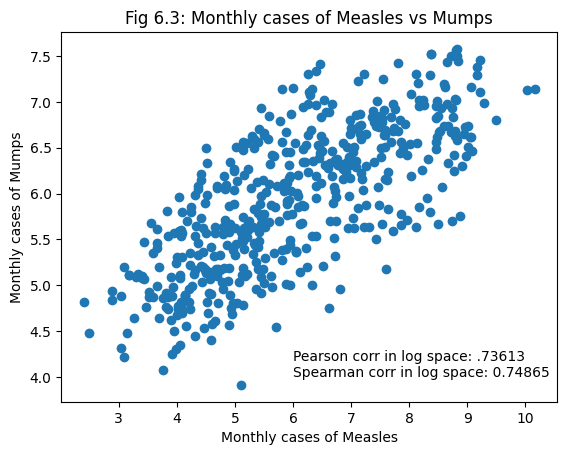

Pearson correlation in log space: %.4f PearsonRResult(statistic=0.7361265261840513, pvalue=4.2492876452992494e-85)
Spearman correlation in log space: %.4f  0.74685


In [148]:
# 6.1 plot overall trend with data from all 492 months


plt.figure()

plt.plot(data_2[0])
plt.plot(data_2[1])
plt.yscale("log")
plt.legend(["Measles","Mumps"])
plt.xlabel('Month')
plt.ylabel('Number of cases')
plt.title('Fig 6.1: Overall trend')
plt.show()


# 6.2 scatter plot and correlation in original scale


plt.figure()

plt.scatter(data_2[0],data_2[1])
plt.text(15000,500,"Pearson corr: .54667 \nSpearman corr: 0.74685 ")



plt.xlabel('Monthly cases of ' + diseases[me])
plt.ylabel('Monthly cases of ' + diseases[mu])
plt.title('Fig 6.2: Monthly cases of %s vs %s' %(diseases[me], diseases[mu]))


# compute and display Pearson correlation coefficient & Spearman correlation


pcc = stats.pearsonr(data_2[0],data_2[1])
print(pcc)

measles_rank = np.argsort(np.argsort(data_2[0]))
mumps_rank = np.argsort(np.argsort(data_2[1]))

spr = round(np.corrcoef(measles_rank,mumps_rank)[0,1],5)

plt.show()

print('Pearson correlation in orignal space: %.4f' , pcc )
print('Spearman correlation in original space: %.4f ', spr )



# 6.3 scatter plot and correlation in log scale
plt.figure()

data_log = np.log(data_2)

plt.scatter(data_log[0],data_log[1])
plt.text(6,4,"Pearson corr in log space: .73613 \nSpearman corr in log space: 0.74865 ")

plt.xlabel('Monthly cases of ' + diseases[me])
plt.ylabel('Monthly cases of ' + diseases[mu])
plt.title('Fig 6.3: Monthly cases of %s vs %s' %(diseases[me], diseases[mu]))


# compute and display Pearson correlation coefficient & Spearman correlation

pcc = stats.pearsonr(data_log[0],data_log[1])
print(pcc)

measles_rank = np.argsort(np.argsort(data_log[0]))
mumps_rank = np.argsort(np.argsort(data_log[1]))

spr = round(np.corrcoef(measles_rank,mumps_rank)[0,1],5)

plt.show()

print('Pearson correlation in log space: %.4f',pcc)
print('Spearman correlation in log space: %.4f ',spr)

